### Support Vector Machines

Theory
- Convert Linear SVM to Nonlinear SVM
- Duality
- Extension of Lagrange multipliers
- Dual Problem of SVMs
- Kernel Trick
- Implicit Feature Transformation
- Neural Networks
- RBF Network
- Mashup of SVM and ANN
- Neural Network Aproximations of SVMs

! Hint: 

Machine learning is about experimenting, being hands on, writing your own code. Machine learning is about programming. Machine learning is not a philosophy course. If you ask, "how would this work theoretically," write some code and experiment. 

#### Beginner's Corner

In [ ]:
from __future__ import print_function, division
from builtins import range
from sklearn.svm import SVC
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

def getKaggleMNIST():
  train = pd.read_csv('../large_files/train.csv').values.astype(np.float64)
  train = shuffle(train)

  Xtrain = train[:-1000, 1:]
  Ytrain = train[:-1000, 0].astype(np.int64)
  
  Xtest = train[-1000:, 1:]
  Ytest = train[-1000:, 0].astype(np.int64)

  # scale 
  Xtrain /= 255.
  Xtest /= 255.

  return Xtrain, Ytrain, Xtest, Ytest

Xtrain, Ytrain, Xtest, Ytest = getKaggleMNIST()

model = SVC()

t0 = datetime.now()
model.fit(Xtrain, Ytrain)
print("train duration: ", datetime.now() - t0)
t0 = datetime.now()
print("train score: ", model.score(Xtrain, Ytrain), "duration: ", datetime.now() - t0)
t0 = datetime.now()
print("test score: ", model.score(Xtest, Ytest), "duration: ", datetime.now() - t0)

#### Basic outline
\#1 Load data <br>
\#2 Apply an algorithm <br>
\#3 Look at the accuracy <br>

<br>
Preprocessing is necessary.

train duration:  0:00:00.718755
train score:  1.0 duration:  0:00:00.629906
test score:  0.9825992387166939 duration:  0:00:00.224410


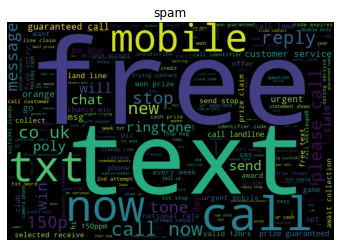

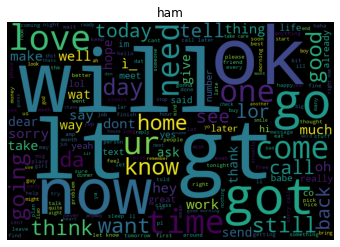

*** things that should be spam ***
Are you unique enough? Find out from 30th August. www.areyouunique.co.uk
Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123
Filthy stories and GIRLS waiting for your
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.
Got what it takes 2 take part in the WRC Rally in Oz? U can with Lucozade Energy! Text RALLY LE to 61200 (25p), see packs or lucozade.co.uk/wrc & itcould be u!
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
FreeMsg:Feelin kinda lnly hope u like 2 keep me company! Jst got a cam moby wanna c my pic?Txt or reply DATE to 82242 Msg150p 2rcv Hlp 08712317606 stop to 82242
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
CALL 09090900040 & LISTEN TO EXTREME DIRTY LIVE CHAT GOING ON IN THE OFFI

In [10]:
from __future__ import print_function, division
from builtins import range

from sklearn.svm import SVC
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

df = pd.read_csv('./large_files/spam.csv', encoding='ISO-8859-1')
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# rename columns
df.columns = ['labels', 'data']

# binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

# try multiple ways of creating features
# tf-idf each row is a document and each column is a word
# (times word appears)/(#of documents containing words)
# normalize by dividing by the word frequency 
tfidf = TfidfVectorizer(decode_error='ignore')
X = tfidf.fit_transform(df['data'])

# try multiple ways of creating features
count_vectorizer = CountVectorizer(decode_error='ignore')
X = count_vectorizer.fit_transform(df['data'])

# split the data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

model = SVC(kernel='linear', C=2.)

t0 = datetime.now()
model.fit(Xtrain, Ytrain)
print("train duration: ", datetime.now() - t0)
t0 = datetime.now()
print("train score: ", model.score(Xtrain, Ytrain), "duration: ", datetime.now() - t0)
t0 = datetime.now()
print("test score: ", model.score(Xtest, Ytest), "duration: ", datetime.now() - t0)

def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.title(label)
  plt.show()

visualize('spam')
visualize('ham')

# see what we are getting wrong
df['predictions'] = model.predict(X)

# things that should be spam
print('*** things that should be spam ***')
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

# things that should not be spam
print('*** things that should be spam ***')
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)
  